In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyhrv
import scipy.io as sio
import biosppy
import pyhrv.tools as tools
import matplotlib as mpl
import seaborn as sns


# CinC 2017

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [21]:
test = pd.read_csv('/home/huypham/Projects/ecg/dataset/cinc2017/processed/y_test.csv')

In [28]:
# cinc_2017_labels = test.drop(columns=['idx']).columns.tolist()
cinc_2017_labels = ['Normal', 'AF', 'Other', 'Noisy']

In [29]:
y_true = test.drop(columns=['idx']).to_numpy()

In [30]:
resnet1d = np.load('/home/huypham/Projects/ecg/tmp/logs_20230120/logs_cinc2017/resnet1d/lightning_logs/version_0/test.npz')['arr_0']

In [31]:
scores = metrics.classification_report(y_pred=resnet1d>0.5, y_true=y_true, target_names=cinc_2017_labels, output_dict=True)

/home/huypham/miniconda3/envs/ecg/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
cinc_2017_f1 = []
for lbl in cinc_2017_labels:
    cinc_2017_f1.append(scores[lbl]['f1-score'])

# CinC 2020

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
test = pd.read_csv('/home/huypham/Projects/ecg/dataset/cinc2020/processed/y_test.csv')

In [12]:
cinc_2020_labels = test.drop(columns=['idx']).columns.tolist()

In [54]:
len(cinc_2020_labels)

28

In [4]:
y_true = test.drop(columns=['idx']).to_numpy()

In [3]:
resnet1d = np.load('/home/huypham/Projects/ecg/tmp/logs_20230120/logs_cinc2020/resnet1d/lightning_logs/version_0/test.npz')['arr_0']

In [16]:
scores = metrics.classification_report(y_pred=resnet1d>0.5, y_true=y_true, target_names=cinc_2020_labels, output_dict=True)

/home/huypham/miniconda3/envs/ecg/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huypham/miniconda3/envs/ecg/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
cinc_2020_f1 = []
for lbl in cinc_2020_labels:
    cinc_2020_f1.append(scores[lbl]['f1-score'])

# Plot

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
classes_2017 = pd.DataFrame(dict(index=cinc_2017_labels, Total=cinc_2017_f1))
classes_2020 = pd.DataFrame(dict(index=cinc_2020_labels, Total=cinc_2020_f1))

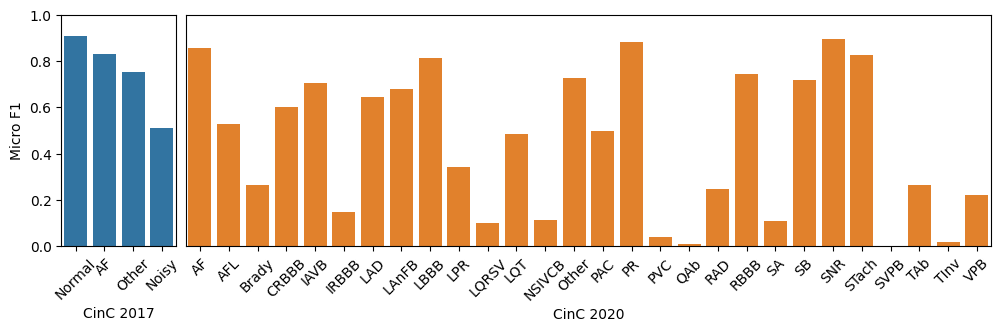

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3), width_ratios=[1, 7])

# CinC2017

ax = sns.barplot(data=classes_2017, x='index', y='Total', color='C0', ax=axs[0])
# ax.set_axis_labels(x_var="Class", y_var="% Samples")
ax.set_xlabel('CinC 2017')
ax.set_ylabel('Micro F1')
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylim(0, 1)
# plt.savefig('cinc2017_classes_dist.pdf', bbox_inches='tight')

# CinC2020

ax = sns.barplot(data=classes_2020, x='index', y='Total', color='C1', ax=axs[1])
# ax.yaxis.tick_right()
# ax.set_axis_labels(x_var="Class", y_var="% Samples")
ax.set_xlabel('CinC 2020')
ax.set_ylabel('')
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylim(0, 1)
ax.set_yticklabels([])
ax.tick_params(left=False)
# plt.savefig('cinc2017_classes_dist.pdf', bbox_inches='tight')

# axs[1].autoscale() ## call autoscale if needed

plt.subplots_adjust(
    left=None, 
    bottom=None, 
    right=None, 
    top=None, 
    wspace=0.02, 
    hspace=0.05,
)

plt.savefig('f1_by_classes.pdf', bbox_inches='tight')